A World map - most popular cartogrpahic methods

In [1]:
import pandas as pd # library for data analysis
import geopandas as gpd
import matplotlib.pyplot as plt

In [28]:
import warnings 
warnings.filterwarnings('ignore')

#### resources:
- https://geopandas.org/en/v0.9.0/docs/user_guide/mapping.html
- https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population

In [2]:
import os
os.chdir(r'd:\git20\GeoPython_Ukraine2024')

In [3]:
df_pop = pd.read_csv(r'.\data\countries_population.csv')
df_pop.head(3)

,Country / Dependency,Population,Date,Source (official or fromthe United Nations)
0,World,8084259000,19 Jan 2024,UN projection[3]
1,China,1409670000,31 Dec 2023,Official estimate[4]
2,India,1392329000,1 Mar 2023,Official projection[5]


<AxesSubplot:>

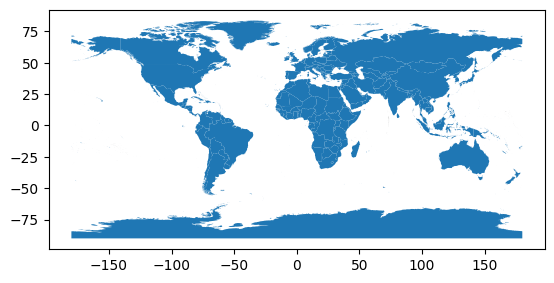

In [4]:
gdf_countries = gpd.read_file(r'geoBoundariesCGAZ_ADM0.shp')
gdf_countries.plot()

In [25]:
gdf_cntrs_pop = gdf_countries.merge(df_pop, left_on='shapeName', right_on='Country / Dependency')
# labeling graticules and lines
epsg_out = 'ESRI:54030'
gdf_cntrs_pop = gdf_cntrs_pop.to_crs(epsg_out)

In [26]:
# gdf_cntrs_pop.Population.hist()

<AxesSubplot:>

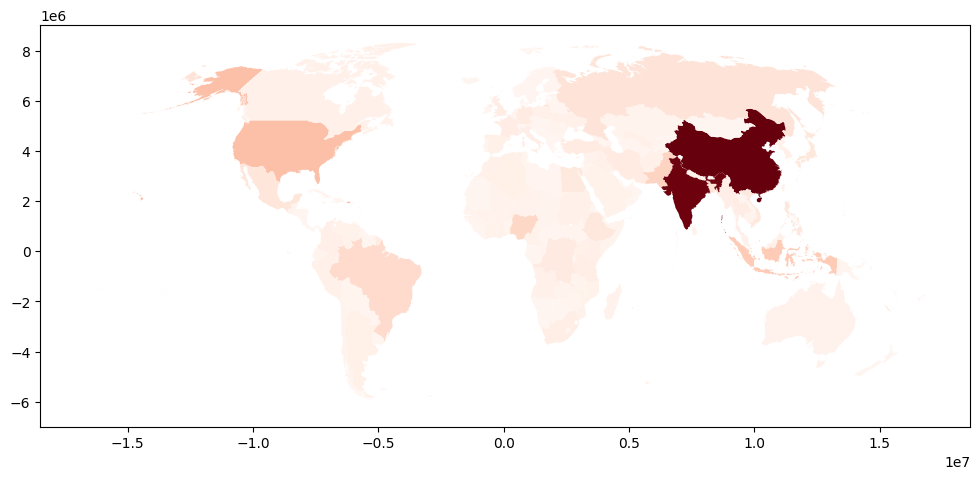

In [7]:
gdf_cntrs_pop.plot(column='Population', cmap='Reds', figsize=(12,10))

In [62]:
# Calculate relative value
gdf_cntrs_pop['area'] = gdf_cntrs_pop.geometry.area / 1_000_000
gdf_cntrs_pop['pop_relative'] = gdf_cntrs_pop['Population'] / gdf_cntrs_pop['area']
gdf_cntrs_pop.head(3)

,shapeGroup,shapeType,shapeName,geometry,Country / Dependency,Population,Date,Source (official or fromthe United Nations),area,pop_relative
0,AFG,ADM0,Afghanistan,"POLYGON ((6606918.954 3981850.245, 6606925.117...",Afghanistan,34262840,1 Jan 2023,Official estimate[45],598039.096447,57.291973
1,GBR,ADM0,United Kingdom,"MULTIPOLYGON (((2944476.161 3705248.432, 29444...",United Kingdom,67026292,30 Jun 2021,Official estimate[26],278785.832177,240.422160
2,ALB,ADM0,Albania,"POLYGON ((1724445.469 4547305.411, 1724481.491...",Albania,2761785,1 Jan 2023,Official estimate[142],28231.802738,97.825315


<AxesSubplot:>

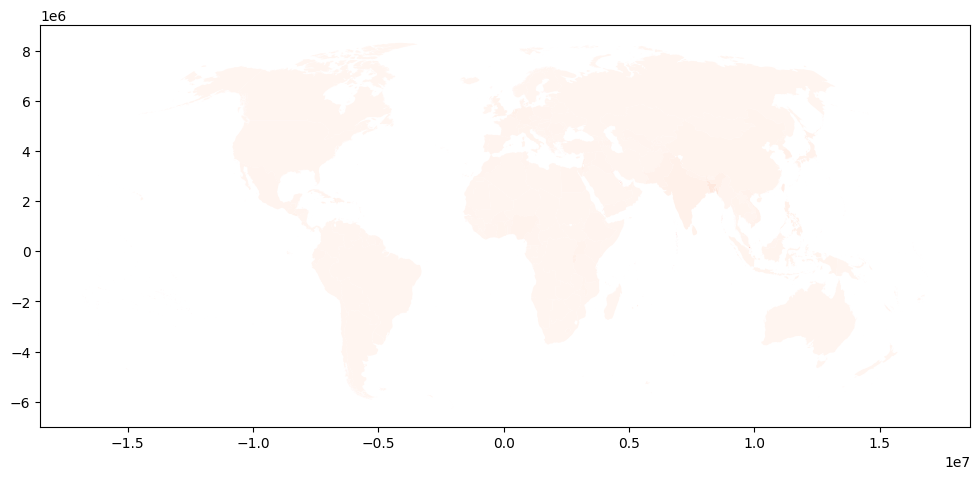

In [9]:
gdf_cntrs_pop.plot(column='pop_relative', cmap='Reds', figsize=(12,10))

c:\Users\Airly\anaconda3\envs\GeoPython_Ukraine2024_v2\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
c:\Users\Airly\anaconda3\envs\GeoPython_Ukraine2024_v2\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(


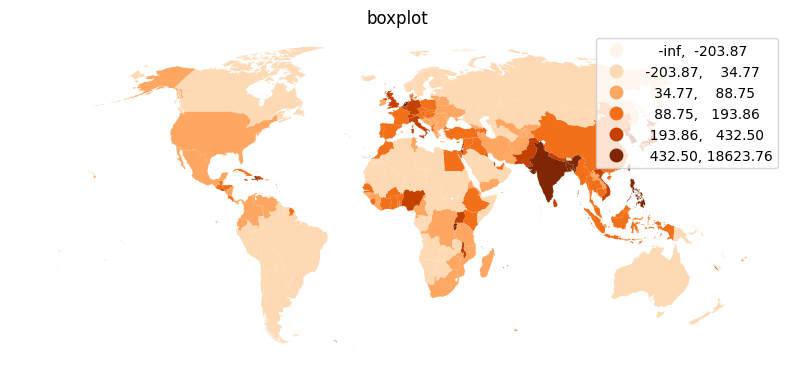

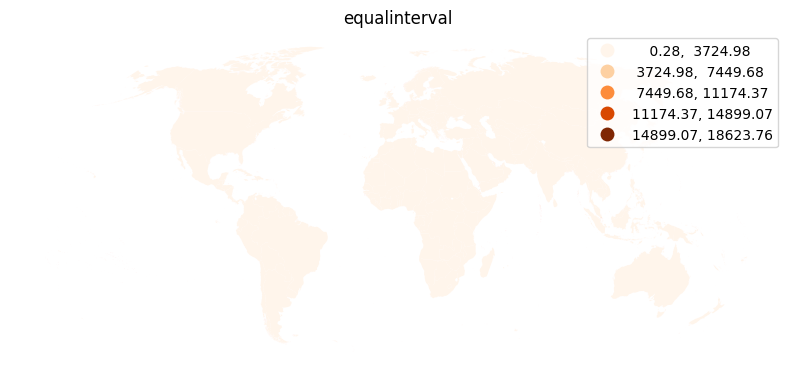

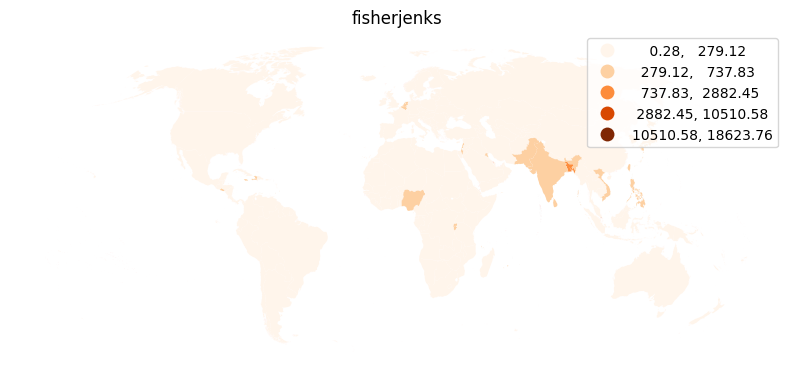

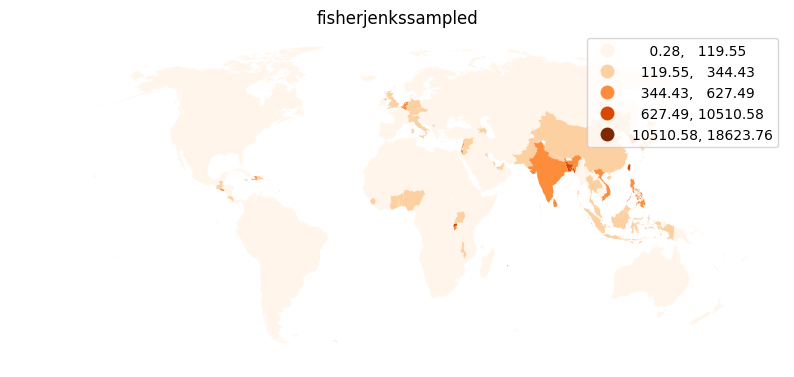

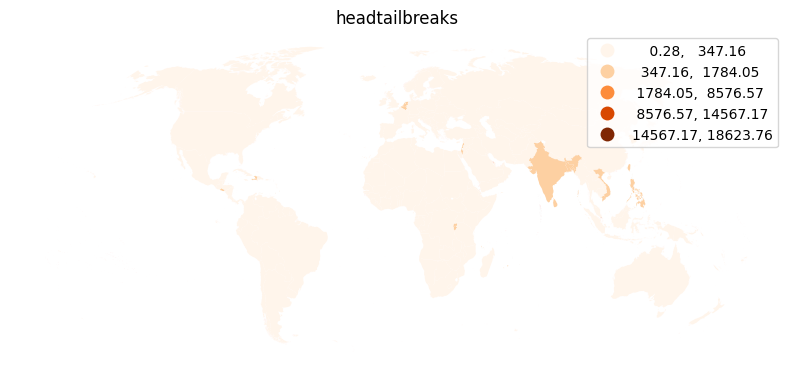

In [10]:
# graduated colors - different ways of dividing into classes

for scheme in ['boxplot', 
            'equalinterval',
            'fisherjenks', 
            'fisherjenkssampled',
            'headtailbreaks',]:
                #  'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp',
                #    'maximumbreaks', 'naturalbreaks', 'quantiles', 'percentiles', 'stdmean']:
    
    fig, ax = plt.subplots(figsize=(10,7))
    gdf_cntrs_pop.plot(column='pop_relative', cmap='Oranges', ax=ax, scheme=scheme, legend=True)
    # ax.get_legend().set_bbox_to_anchor((1.2, 0.5))

    ax.axis('off')
    plt.title(scheme)

<AxesSubplot:>

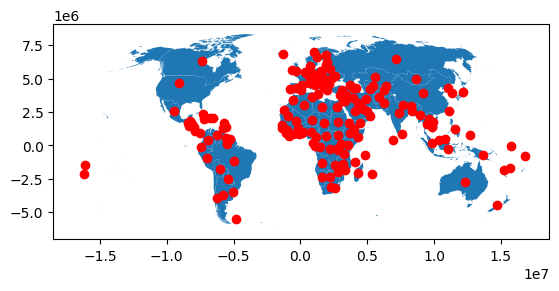

In [50]:
# Graduated symbols visualisation - all centroids - are they ok?
gdf_cntrs_centr = gdf_cntrs_pop.copy()
fig, ax = plt.subplots()
gdf_cntrs_pop.plot(ax=ax)
gdf_cntrs_centr['geometry'] = gdf_cntrs_centr.geometry.centroid
gdf_cntrs_centr.plot(ax=ax, color='red')

<AxesSubplot:>

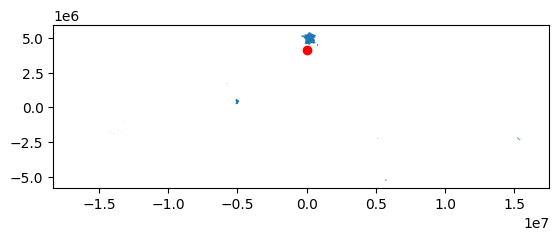

In [44]:
# France example
fig, ax = plt.subplots()
gdf_cntrs_pop[gdf_cntrs_pop.shapeName=='France'].plot(ax=ax)
gdf_cntrs_centr[gdf_cntrs_centr.shapeName=='France'].plot(ax=ax, color='red')

In [54]:
# fix problems with the multipolygons and multicentroids
gdf_cntrs_centr = gdf_cntrs_pop.copy()
gdf_cntrs_centr = gdf_cntrs_centr.explode()
gdf_cntrs_centr['area'] = gdf_cntrs_centr.geometry.area
gdf_cntrs_centr = gdf_cntrs_centr.sort_values('area', ascending=False)
gdf_cntrs_centr = gdf_cntrs_centr.drop_duplicates('shapeName')
gdf_cntrs_centr['geometry'] = gdf_cntrs_centr.geometry.centroid

<AxesSubplot:>

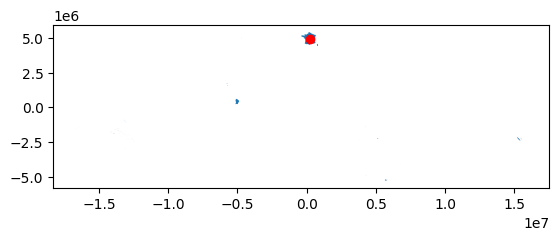

In [55]:
# France example again
fig, ax = plt.subplots()
gdf_cntrs_pop[gdf_cntrs_pop.shapeName=='France'].plot(ax=ax)
gdf_cntrs_centr[gdf_cntrs_centr.shapeName=='France'].plot(ax=ax, color='red')

<AxesSubplot:>

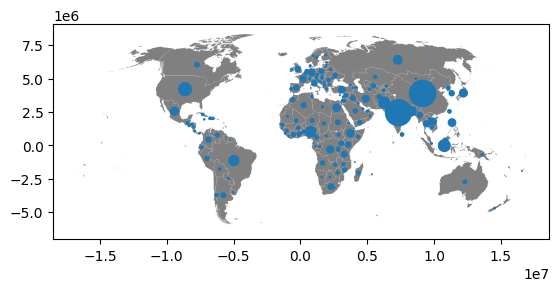

In [56]:
# plot graduated symbols
fig, ax = plt.subplots()
gdf_cntrs_pop.plot(ax=ax, color='gray')
gdf_cntrs_centr.plot(markersize=gdf_cntrs_centr['Population']/4_000_000, ax=ax)

(-18494881.103813104, 18614126.231858872, -7015690.730060082, 9047252.22180611)

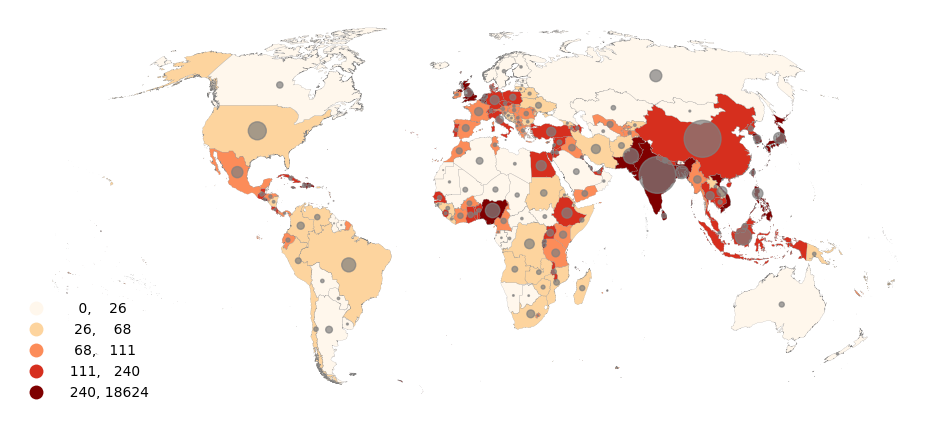

In [14]:
# plot nice maps: auto assing classes and colors
fig, ax = plt.subplots(figsize=(12,6))

gdf_cntrs_pop.plot(column='pop_relative', cmap='OrRd', ax=ax, scheme='quantiles', legend=True,
                   legend_kwds={'loc': 'lower left', 'frameon': False, 'fmt':"{:.0f}"})


gdf_cntrs_pop.boundary.plot(ax=ax, linewidth=0.1, color='gray')
gdf_cntrs_centr.plot(markersize=gdf_cntrs_centr['Population']/2_000_000,
                                   alpha=0.7, color='gray', ax=ax)

ax.axis('off')

(-18494881.103813104, 18614126.231858872, -7015690.730060082, 9047252.22180611)

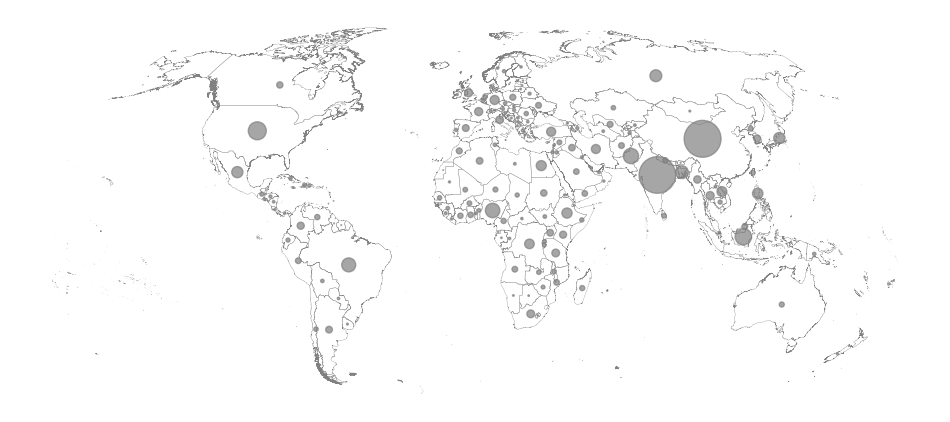

In [48]:
# better classification
# levels = [0, 10, 25, 50, 100, 200, 1500]
# colors = ['#ffffd4', '#fee391', '#fec44f', '#fe9929', '#d95f0e', '#993404']

fig, ax = plt.subplots(figsize=(12,6))

levels = [0, 10, 25, 50, 100, 200, 1500]
colors = ['#ffffd4', '#fee391', '#fec44f', '#fe9929', '#d95f0e', '#993404']
import matplotlib
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)

# gdf_cntrs_pop.plot(column='pop_relative', cmap=cmap, norm=norm, ax=ax, legend=True)
gdf_cntrs_pop.boundary.plot(linewidth=0.2, color='gray', ax=ax)
gdf_cntrs_centr.plot(markersize=gdf_cntrs_centr['Population']/2_000_000, legend=True,
                                   alpha=0.7, color='gray', ax=ax)

ax.axis('off')

In [16]:
#  show that anything - a shape or a text may be plotted on a map - and what about it?

(-18494881.103813104, 18614126.231858872, -7015690.730060082, 9047252.22180611)

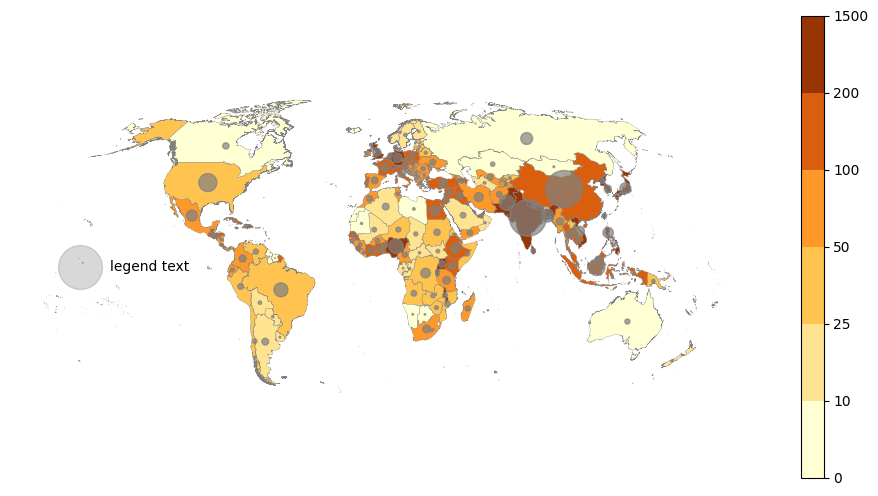

In [65]:
fig, ax = plt.subplots(figsize=(12,6))

levels = [0, 10, 25, 50, 100, 200, 1500]
colors = ['#ffffd4', '#fee391', '#fec44f', '#fe9929', '#d95f0e', '#993404']
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)

gdf_cntrs_pop.plot(column='pop_relative', cmap=cmap, norm=norm, ax=ax, legend=True)
gdf_cntrs_pop.boundary.plot(linewidth=0.2, color='gray', ax=ax)
gdf_cntrs_centr.plot(markersize=gdf_cntrs_centr['Population']/2_000_000, legend=True,
                                   alpha=0.7, color='gray', ax=ax)

circle = ax.scatter(-15_000_000, 0, s=1000, marker='o', color='gray', alpha=0.3)
ax.text(-13_500_000, -200_000, 'legend text', fontsize=10)
ax.axis('off')

Plot a great world base map

In [63]:
from pyproj import Proj, transform
import matplotlib.patches as patches
outProj = Proj(epsg_out)  
inProj = Proj('epsg:4326') 

def plot_labels(ax):
    for y, x, name in zip([80, -145, -130, -130], 
                        [68, 25, -22.5, -65],  
                        ['North Arctic Circle', 'Tropic of Cancer', 
                        'Tropic od Capicorn', 'South Arctic Circle']):

        x2,y2 = transform(inProj,outProj, x, y)
        ax.text(x2, y2, name, color='gray', fontsize=6)


    for lon in [0, 30, 60, 90, 120, 150]:
        for sign in [-1,1]:
            for sign_2 in [-1,1]:
                x2, y2 = transform(inProj,outProj, 90 * sign_2, lon * sign)
                if sign_2 > 0:
                    y2 = y2 + 100_000
                else:
                    y2 = y2 - 350_000
                x2 = x2 - 320_000
                ax.text(x2, y2, str(lon) + '°', color='gray', fontsize=7)


    def zaokragl_do_wielokrotnosci_10(liczba):
        return abs(round(liczba / 10) * 10)

    for lat, x_offset in zip([-61, -31, 0, 30, 60], [300_000, 100_000, 20_000, 10_000, 10_000]):
        x2, y2 = transform(inProj, outProj, lat, 180)
        ax.text(x2 + x_offset, y2, str(zaokragl_do_wielokrotnosci_10(lat)) + '°', color='gray', fontsize=7)

    for lat, x_offset in zip([-61, -31, 0, 30, 60], [700_000, 500_000, 300_000, 450_000, 400_000]):
        x2, y2 = transform(inProj, outProj, lat, -180)
        ax.text(x2 - x_offset, y2, str(zaokragl_do_wielokrotnosci_10(lat)) + '°', color='gray', fontsize=7)

    return ax


def plot_base_map():
    # Extra layers
    # Graticules
    graticules = gpd.read_file(r'.\data\graticules_10.shp')
    graticules_select = graticules[graticules.degrees.isin([0,30,60,90,120,150])]
    graticules_select = graticules_select.to_crs(epsg_out)

    # Oceans
    gdf_ocean = gpd.read_file(r'.\data\oceans.shp')
    gdf_ocean = gdf_ocean.to_crs(epsg_out)

    # tropics
    geo_lines = gpd.read_file(r'.\data\geo_lines.shp')
    geo_lines = geo_lines.to_crs(epsg_out)
    geo_lines = geo_lines[geo_lines.featurecla =='Circle of latitude']

    # world
    world = gpd.read_file(r'.\data\world.shp')
    world = world.to_crs(epsg_out)

    fig, ax = plt.subplots(figsize=(18,10))
    gdf_ocean.plot(ax=ax, color='#bee8ff')
    world.buffer(5_000).boundary.plot(ax=ax, color='black', linewidth=0.5)
    world.buffer(600_000).boundary.plot(ax=ax, color='black', linewidth=1.2)
    graticules_select.plot(ax=ax, color='gray', linewidth=0.4)
    geo_lines.plot(ax=ax, color='gray', linewidth=0.4, linestyle='--')
    ax.axis('off')
    return ax


def plot_main_map(ax, colors):
    levels = [0, 10, 25, 50, 100, 200, 1500]
    cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)

    gdf_cntrs_pop.plot(column='pop_relative', cmap=cmap, norm=norm, ax=ax)
    gdf_cntrs_pop.boundary.plot(linewidth=0.2, color='gray', ax=ax)
    gdf_cntrs_centr.plot(markersize=gdf_cntrs_centr['Population']/2_000_000,
                                    alpha=0.7, color='gray', ax=ax)
    return ax



def plot_legend(ax, colors):
    x_loc = -10_000_000
    offset = 750_000

    for color, name in zip(colors, ['<10', '10-25', '25-50', '50-100', '100-200', '>200']):
        x_loc = x_loc + offset
        rect = patches.Rectangle((-19_500_000, x_loc), 700_000, 500_000, facecolor=color)
        ax.text(-18_500_000, x_loc + 120_000, name, size=10)
        ax.add_patch(rect)

    # circles 
    circle = ax.scatter(-15_800_000, x_loc - 3_200_000, s=1000, marker='o', color='gray', alpha=0.3)
    circle = ax.scatter(-15_800_000, x_loc - 3_500_000, s=250, marker='o', color='gray', alpha=0.3)

    ax.text(-14_800_000, x_loc - 2_800_000, '1000M', fontsize=10)
    ax.text(-14_800_000,  x_loc - 3_500_000, '250M', fontsize=10)

    return ax

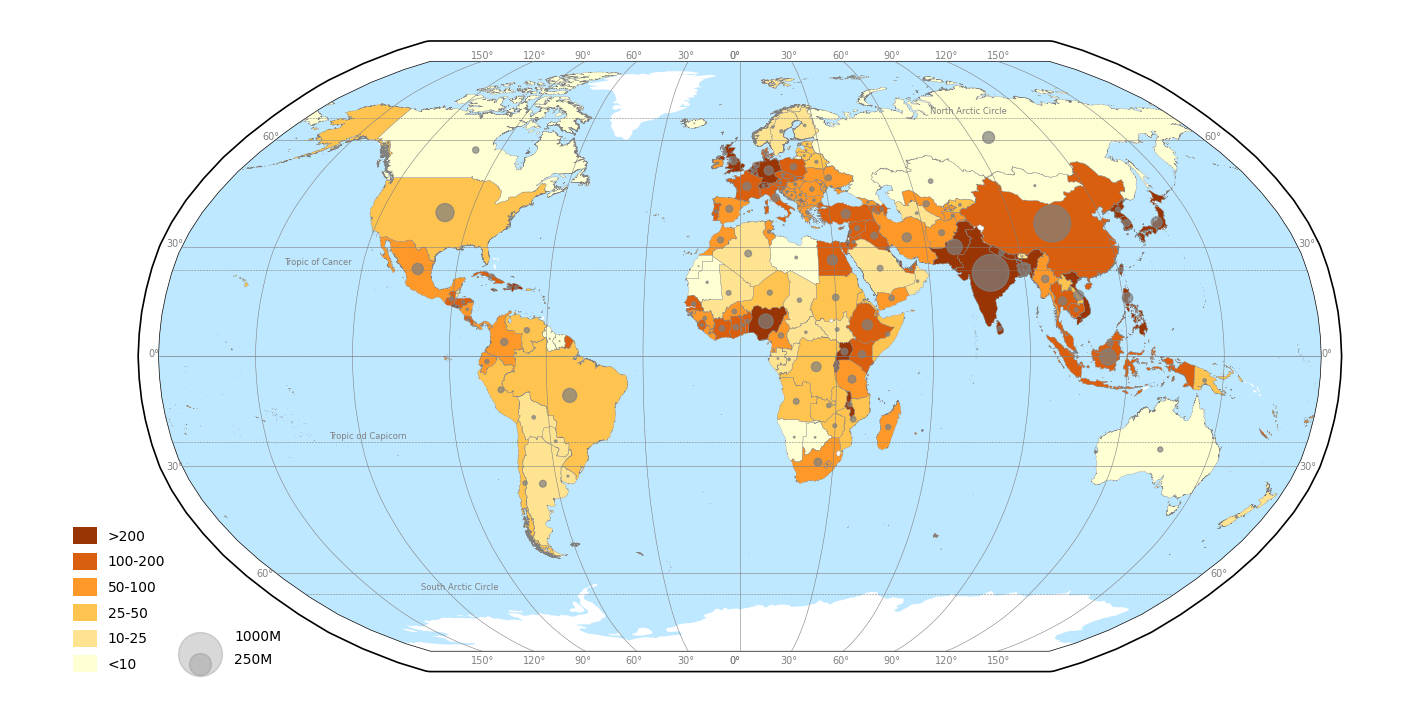

In [64]:
ax = plot_base_map()
ax = plot_labels(ax)
colors = ['#ffffd4', '#fee391', '#fec44f', '#fe9929', '#d95f0e', '#993404']
ax = plot_main_map(ax, colors)
ax = plot_legend(ax, colors)

In [20]:
# TODO plot final writings